## Daten-Exploration und Visualisierung
Wir untersuchen Einkommensdaten (gegeben in `data/wage.csv.gz`) mit Hilfe von
- [pandas](http://pandas.pydata.org/) und
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) (hence [matplotlib](http://matplotlib.org/)).


**Questions:**
- Wie hängt das Einkommen vom Alter ab?
- Wie hängt das Einkommen vom Ausbildungsgrad ab?

### Vorbereitung

In [1]:
# some imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline

### Laden

In [2]:
# if the file were not gzipped, we could now take a look at its content via
# cat data/wage.csv

In [3]:
df = pd.read_csv('data/wage.csv.gz', index_col=0)

In [4]:
df.head(3)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [5]:
df.columns

Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [6]:
df.describe()[['age', 'wage']]

,age,wage
count,3000.000000,3000.000000
mean,42.414667,111.703608
std,11.542406,41.728595
min,18.000000,20.085537
25%,33.750000,85.383940
50%,42.000000,104.921507
75%,51.000000,128.680488
max,80.000000,318.342430


In [7]:
df['sex'].unique()

array(['1. Male'], dtype=object)

### Wie hält das Einkommen vom Alter ab?

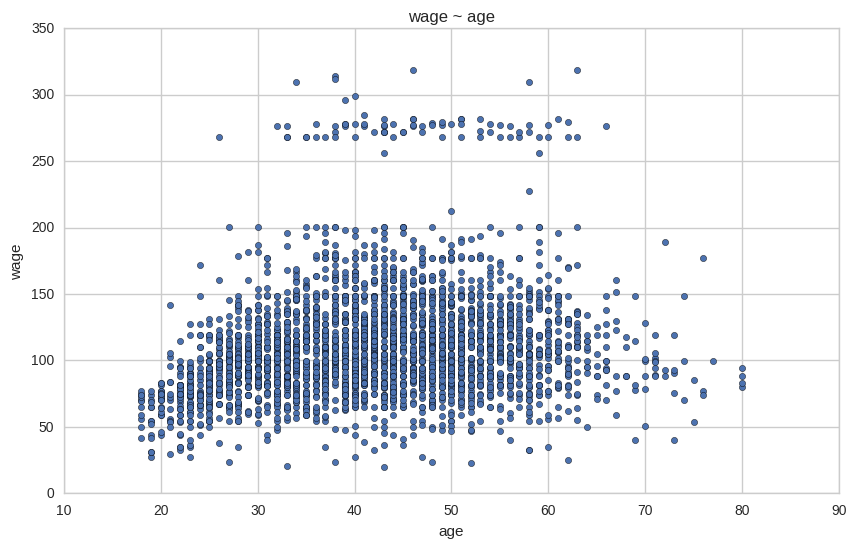

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x='age', y='wage', title='wage ~ age', ax=ax)

In [9]:
median_wage = df.groupby('age')[['wage']].agg(np.median)
median_wage.head()

,wage
age,
18,69.619037
19,54.598150
20,71.482747
21,72.150456
22,75.043154


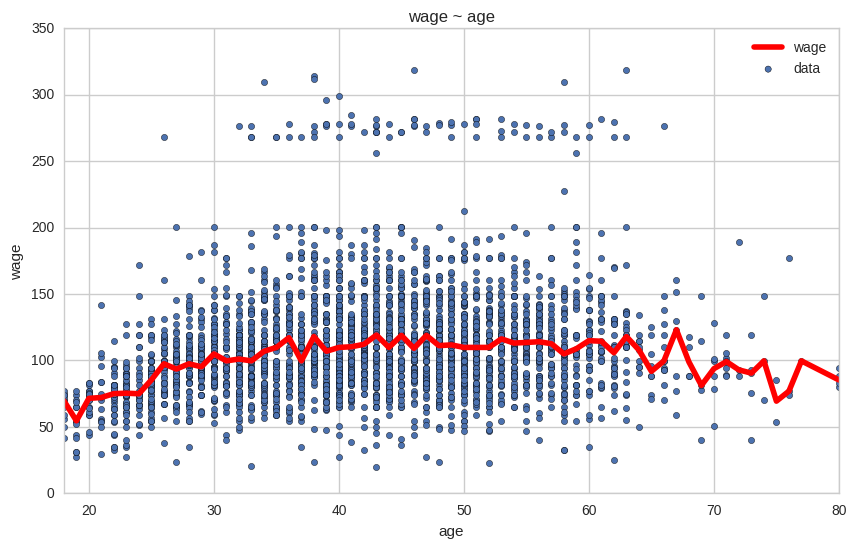

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x='age', y='wage', title='wage ~ age', label='data', ax=ax)
median_wage.plot.line(label='median', linewidth=4, color='r', ax=ax)
ax.legend()

### Wie hängt das Einkommen vom Ausbildungsgrad ab?

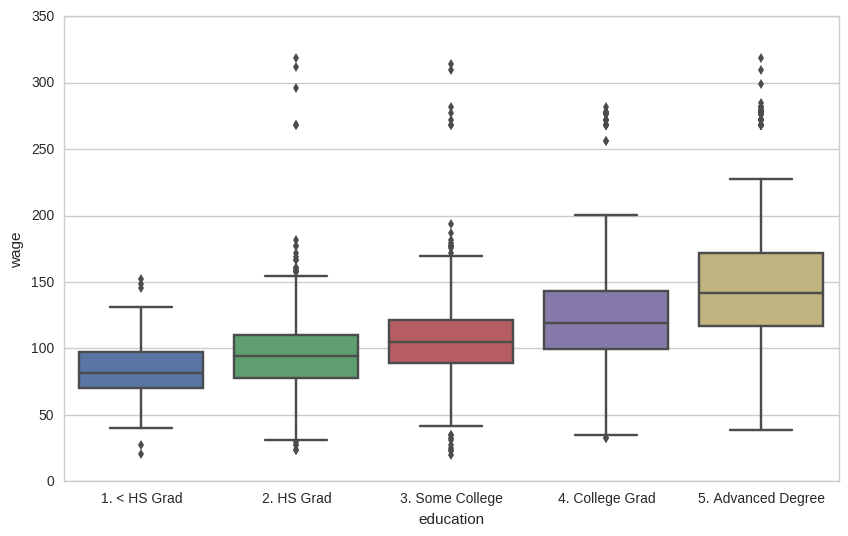

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', data=df, 
            order=sorted(df['education'].unique()), ax=ax)

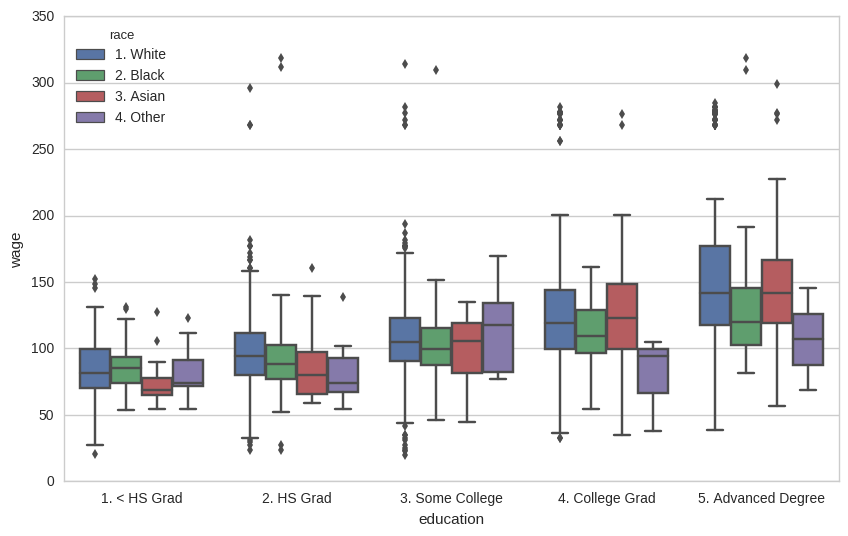

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', hue='race', data=df, 
            order=sorted(df['education'].unique()), 
            hue_order=sorted(df['race'].unique()), 
            ax=ax)

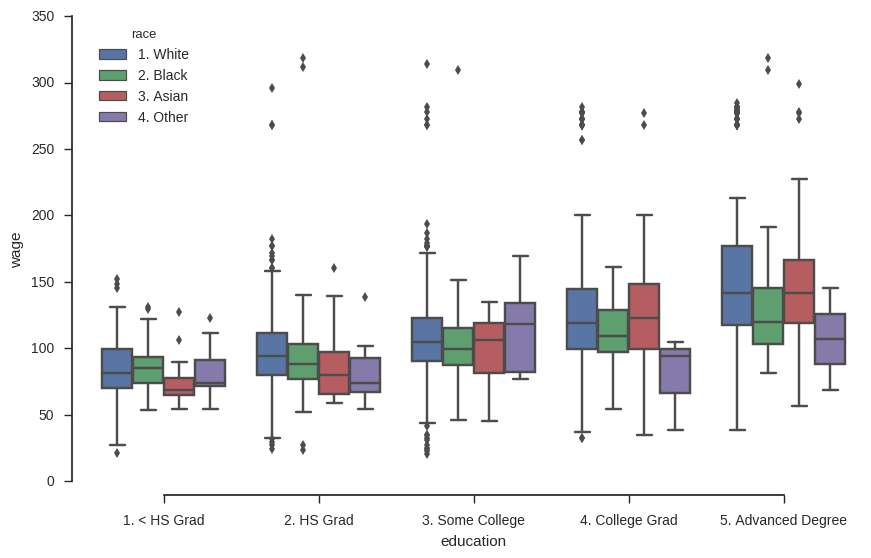

In [13]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', hue='race', data=df, 
            order=sorted(df['education'].unique()), 
            hue_order=sorted(df['race'].unique()), 
            ax=ax)
sns.despine(offset=10, trim=True)

In [14]:
df.groupby(['education', 'race'])[['wage']].agg(np.median)

wage
education          race                
1. < HS Grad       1. White   81.283253
                   2. Black   85.383940
                   3. Asian   68.748088
                   4. Other   73.775743
2. HS Grad         1. White   94.072715
                   2. Black   87.981033
                   3. Asian   79.854900
                   4. Other   73.775743
3. Some College    1. White  104.921507
                   2. Black   99.689464
                   3. Asian  105.903197
                   4. Other  118.015588
4. College Grad    1. White  118.884359
                   2. Black  109.354256
                   3. Asian  123.089700
                   4. Other   94.072715
5. Advanced Degree 1. White  141.775172
                   2. Black  119.740851
                   3. Asian  141.775172
                   4. Other  106.945844

In [15]:
df_res = df.groupby(['education', 'race'])[['wage']].agg(np.median)
df_res.to_excel('great_insight.xlsx')

#### Kommentare
- Daten aus [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)